![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

## ARE THERE MORE GOALS SCORE IN WOMEN'S INTERNATIONAL FOOTBALL MATCHES THAN MEN'S

In [1]:
import pandas as pd
#load the datasets
men_results = pd.read_csv("datasets/men_results.csv")
women_results = pd.read_csv("datasets/women_results.csv")

display(men_results.head())
women_results.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


### EXPLANATORY DATA ANALYSIS (EDA)

In [2]:
men_results.info()
women_results.info()

#drop the unnamed: 0 columns as it serves no purpose

men_results.drop(columns = "Unnamed: 0",inplace = True, axis = 1)
women_results.drop(columns = "Unnamed: 0",inplace = True, axis = 1)

display(men_results.head())
women_results.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3)

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [3]:
#Check for null values
women_results.isna().sum()
men_results.isna().sum()
#look at the summary statistics for both dataframes
display(men_results.describe())
women_results.describe()


,home_score,away_score
count,44353.000000,44353.000000
mean,1.740559,1.178793
std,1.748722,1.394580
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


,home_score,away_score
count,4884.000000,4884.000000
mean,2.272727,1.431409
std,2.736377,1.974651
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,24.000000,24.000000


### The women team has a slightly higher mean home and away score compared to the men's team. We now carry out our hypothesis test to evaluate the significance of this difference


#### Since there are two independent groups, men's and women's this will require an unpaired two-sample test.

In [6]:
#subset the dataframes for worldcup matches
subset_men_results = men_results[(men_results["tournament"] == "FIFA World Cup") & \
                                 (men_results["date"] >= "2002-01-01")]
subset_women_results = women_results[(women_results["tournament"] ==  "FIFA World Cup") &\
                                    (women_results["date"] > "2002-01-01")]

subset_men_results.head()
subset_women_results.head()
#create a total score column for each match for both dataframes
subset_men_results["final_score"] = subset_men_results.loc[:, ["home_score", "away_score"]].sum(axis=1)
subset_women_results["final_score"] = subset_women_results.loc[:,["home_score", "away_score"]].sum(axis = 1)
#add a gender column
subset_men_results["gender"] = "men"
subset_women_results["gender"] = "women"

display(subset_men_results.head())
subset_women_results.head()



C:\Users\josep\AppData\Local\Temp\ipykernel_24752\3084770683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_men_results["final_score"] = subset_men_results.loc[:, ["home_score", "away_score"]].sum(axis=1)
C:\Users\josep\AppData\Local\Temp\ipykernel_24752\3084770683.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_women_results["final_score"] = subset_women_results.loc[:,["home_score", "away_score"]].sum(axis = 1)
C:\Users\josep\AppData\Local\Temp\ipykernel_24752\3084770683.py:13: Set

,date,home_team,away_team,home_score,away_score,tournament,final_score,gender
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,men
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,men
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,men
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,men
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,men


,date,home_team,away_team,home_score,away_score,tournament,final_score,gender
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3,women
1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2,women
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5,women
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6,women
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4,women


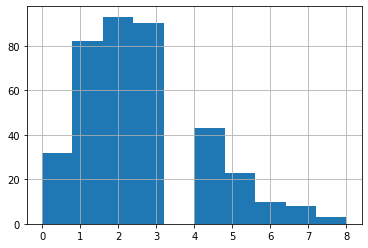

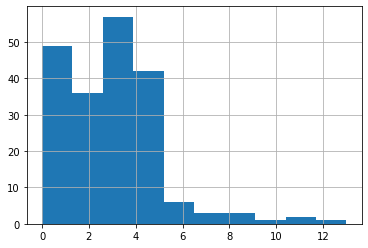

In [ ]:
import matplotlib.pyplot as plt
#Determine whether the scores are normally distributed
plt.figure()
subset_men_results["final_score"].hist()
plt.figure()
subset_women_results["final_score"].hist()
plt.show()


### The goals scored are not normally distributed therefore we perform a Wilcoxon-Mann-Whitney Test

In [ ]:
#Join the two dataframes
men_women = pd.concat([subset_women_results,subset_men_results], axis = 0,ignore_index = True)
men_women

,date,home_team,away_team,home_score,away_score,tournament,final_score,gender
0,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3,women
1,2003-09-20,Norway,France,2,0,FIFA World Cup,2,women
2,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5,women
3,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6,women
4,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4,women
...,...,...,...,...,...,...,...,...
579,2022-12-10,England,France,1,2,FIFA World Cup,3,men
580,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3,men
581,2022-12-14,France,Morocco,2,0,FIFA World Cup,2,men
582,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3,men


In [ ]:
#convert the final score and gender column into wide format
score_gender = men_women[["gender", "final_score"]]
score_gender_wide = score_gender.pivot(columns ="gender", values = "final_score")
score_gender_wide

gender,men,women
0,NaN,3.0
1,NaN,2.0
2,NaN,5.0
3,NaN,6.0
4,NaN,4.0
...,...,...
579,3.0,NaN
580,3.0,NaN
581,2.0,NaN
582,3.0,NaN


In [ ]:
#perform the wilcoxon-Mann Whitney Test
import pingouin
alpha = 0.01
result = pingouin.mwu(x = score_gender_wide["women"],
            y = score_gender_wide["men"], 
            alternative = "greater")

p_val = result["p-val"].values[0]


if (p_val < alpha):
    result = "reject"
else: 
    result = "fail to reject"


#store our findings in a dicitonary
result_dict = {"p_val":p_val, "result": result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}

## CONCLUSION

### Since the p value is smaller than our significance level we reject our null hypothesis i.e the mean number of women goals scored in World cup mathces is the same with the men's. This therefore infers that women have a higher mean goal count than mean in the FIFA World Cup.